In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('Data/BWC_Neotropical_region.csv')

In [3]:
data['Age'].unique()

array(['Unknown', 'Adult', 'Juvenile'], dtype=object)

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4103 entries, 0 to 4102
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   General.ID              4103 non-null   int64 
 1   Order                   4103 non-null   object
 2   Family                  4103 non-null   object
 3   Genus                   4103 non-null   object
 4   Species                 4103 non-null   object
 5   Common.name             4103 non-null   object
 6   IUCN.status             4103 non-null   object
 7   Survivorship            4103 non-null   object
 8   Age                     4103 non-null   object
 9   Sex                     4103 non-null   object
 10  Year                    4103 non-null   object
 11  Month                   4103 non-null   object
 12  Day                     4103 non-null   object
 13  Date.accuracy           4103 non-null   object
 14  Latitude                4103 non-null   object
 15  Long

,General.ID,Order,Family,Genus,Species,Common.name,IUCN.status,Survivorship,Age,Sex,...,Latitude,Longitude,Location.accuracy,Locality,State.or.Province,Country,Deterrent,Building.height,Pane.type,Data.collection.method
0,1,Columbiformes,Columbidae,Columbina,Columbina talpacoti,Ruddy Ground Dove,Least Concern,Dead,Unknown,Unknown,...,-23.58,-47.53,Precise,Sorocaba,Sao Paulo,Brazil,NaN,Taller,Reflective,Systematic
1,2,Columbiformes,Columbidae,Columbina,Columbina talpacoti,Ruddy Ground Dove,Least Concern,Dead,Adult,Male,...,-23.58,-47.53,Precise,Sorocaba,Sao Paulo,Brazil,Present,Taller,Reflective,Systematic
2,3,Columbiformes,Columbidae,Columbina,Columbina talpacoti,Ruddy Ground Dove,Least Concern,Dead,Adult,Female,...,-23.58,-47.53,Precise,Sorocaba,Sao Paulo,Brazil,NaN,Taller,Reflective,Systematic
3,4,Columbiformes,Columbidae,Columbina,Columbina talpacoti,Ruddy Ground Dove,Least Concern,Dead,Adult,Female,...,-23.58,-47.53,Precise,Sorocaba,Sao Paulo,Brazil,NaN,Taller,Reflective,Systematic
4,5,Columbiformes,Columbidae,Columbina,Columbina talpacoti,Ruddy Ground Dove,Least Concern,Dead,Adult,Male,...,-23.58,-47.53,Precise,Sorocaba,Sao Paulo,Brazil,NaN,Taller,Reflective,Systematic


In [5]:
data['Order'].unique()


array(['Columbiformes', 'Coraciiformes', 'Passeriformes', 'Strigiformes',
       'Apodiformes', 'Piciformes', 'Falconiformes', 'Galliformes',
       'Cuculiformes', 'Accipitriformes', 'Caprimulgiformes',
       'Gruiformes', 'Psittaciformes', 'Nyctibiiformes', 'Suliformes',
       'Anseriformes', 'Tinamiformes', 'Trogoniformes', 'Charadriiformes',
       'Cathartiformes', 'Galbuliformes', 'Pelecaniformes',
       'Steatornithiformes'], dtype=object)

In [6]:
data['Survivorship'].value_counts()

Survivorship
Dead       2537
Alive      1515
Unknown      51
Name: count, dtype: int64

In [7]:
def preencher_moda_prioridade(df, col, prioridade):
    for idx, row in df[df[col] == 'Unknown'].iterrows():
        valor = None
        for nivel in prioridade:
            filtro = (df[nivel] == row[nivel]) & (df[col] != 'Unknown')
            moda = df.loc[filtro, col].mode()
            if not moda.empty:
                valor = moda[0]
                break
        if valor is not None:
            df.at[idx, col] = valor

prioridade = ['Species', 'Genus', 'Family', 'Order']

for col in ['Survivorship', 'Age', 'Sex', 'Building.height']:
    preencher_moda_prioridade(data, col, prioridade)

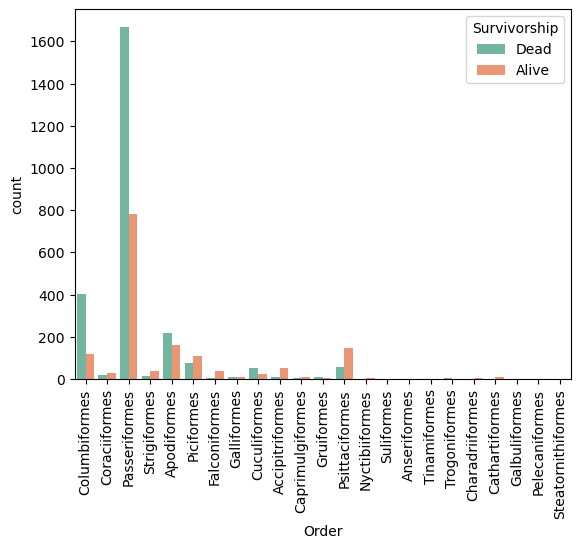

In [8]:
sns.countplot(data=data, x='Order', hue='Survivorship', palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [9]:
data.columns

Index(['General.ID', 'Order', 'Family', 'Genus', 'Species', 'Common.name',
       'IUCN.status', 'Survivorship', 'Age', 'Sex', 'Year', 'Month', 'Day',
       'Date.accuracy', 'Latitude', 'Longitude', 'Location.accuracy',
       'Locality', 'State.or.Province', 'Country', 'Deterrent',
       'Building.height', 'Pane.type', 'Data.collection.method'],
      dtype='object')

In [10]:
data['Family'].value_counts()

Family
Turdidae             757
Columbidae           520
Thraupidae           427
Trochilidae          364
Tyrannidae           211
Parulidae            207
Psittacidae          202
Cardinalidae         149
Vireonidae           139
Picidae              105
Passerellidae         88
Fringillidae          85
Pipridae              84
Ramphastidae          81
Cuculidae             79
Passeridae            64
Accipitridae          58
Strigidae             52
Icteriidae            50
Hirundinidae          49
Falconidae            44
Furnariidae           41
Troglodytidae         38
Momotidae             24
Alcedinidae           22
Tityridae             21
Cracidae              19
Cotingidae            16
Rallidae              14
Caprimulgidae         14
Apodidae              13
Cathartidae           12
Trogonidae             6
Thamnophilidae         6
Grallariidae           5
Mimidae                5
Nyctibiidae            5
Charadriidae           3
Phalacrocoracidae      2
Corvidae          

In [11]:
from sklearn.preprocessing import OneHotEncoder

# Codifica todas as colunas de uma vez e concatena ao DataFrame original
encoders = {
    'Survivorship': OneHotEncoder(sparse_output=False),
    'Order': OneHotEncoder(sparse_output=False),
    'Genus': OneHotEncoder(sparse_output=False),
    'Sex': OneHotEncoder(sparse_output=False),
    'Family' : OneHotEncoder(sparse_output=False),
    'Species' : OneHotEncoder(sparse_output=False)
}

encoded_dfs = []
for col, encoder in encoders.items():
    encoded = encoder.fit_transform(data[[col]])
    col_names = [f"{col}_{cat}" for cat in encoder.categories_[0]]
    encoded_df = pd.DataFrame(encoded, columns=col_names, index=data.index)
    encoded_dfs.append(encoded_df)

# Concatena todas as novas colunas de uma vez só
data = pd.concat([data] + encoded_dfs, axis=1)

# Opcional: desfragmenta o DataFrame para melhor performance
data = data.copy()

In [12]:
data.columns

Index(['General.ID', 'Order', 'Family', 'Genus', 'Species', 'Common.name',
       'IUCN.status', 'Survivorship', 'Age', 'Sex',
       ...
       'Species_Xiphorhynchus erythropygius', 'Species_Xiphorhynchus fuscus',
       'Species_Zenaida asiatica', 'Species_Zenaida auriculata',
       'Species_Zenaida macroura', 'Species_Zentrygon chiriquensis',
       'Species_Zentrygon costaricensis', 'Species_Zimmerius chrysops',
       'Species_Zimmerius parvus', 'Species_Zonotrichia capensis'],
      dtype='object', length=987)

In [13]:
from sklearn.preprocessing import OrdinalEncoder

# Codifica as colunas e armazena em DataFrames auxiliares
oe_age = OrdinalEncoder()
age_encoded = oe_age.fit_transform(data[['Age']]).ravel()
age_df = pd.DataFrame({'Age_encoded': age_encoded}, index=data.index)

oe_building_height = OrdinalEncoder()
building_height_encoded = oe_building_height.fit_transform(data[['Building.height']]).ravel()
building_height_df = pd.DataFrame({'Building_height_encoded': building_height_encoded}, index=data.index)

# Concatena todas as novas colunas de uma vez só
data = pd.concat([data, age_df, building_height_df], axis=1)

# Opcional: desfragmenta o DataFrame para melhor performance
data = data.copy()

In [14]:
print(data.columns.tolist())

['General.ID', 'Order', 'Family', 'Genus', 'Species', 'Common.name', 'IUCN.status', 'Survivorship', 'Age', 'Sex', 'Year', 'Month', 'Day', 'Date.accuracy', 'Latitude', 'Longitude', 'Location.accuracy', 'Locality', 'State.or.Province', 'Country', 'Deterrent', 'Building.height', 'Pane.type', 'Data.collection.method', 'Survivorship_Alive', 'Survivorship_Dead', 'Order_Accipitriformes', 'Order_Anseriformes', 'Order_Apodiformes', 'Order_Caprimulgiformes', 'Order_Cathartiformes', 'Order_Charadriiformes', 'Order_Columbiformes', 'Order_Coraciiformes', 'Order_Cuculiformes', 'Order_Falconiformes', 'Order_Galbuliformes', 'Order_Galliformes', 'Order_Gruiformes', 'Order_Nyctibiiformes', 'Order_Passeriformes', 'Order_Pelecaniformes', 'Order_Piciformes', 'Order_Psittaciformes', 'Order_Steatornithiformes', 'Order_Strigiformes', 'Order_Suliformes', 'Order_Tinamiformes', 'Order_Trogoniformes', 'Genus_Accipiter', 'Genus_Adelomyia', 'Genus_Aglaiocercus', 'Genus_Amaurolimnas', 'Genus_Amazilia', 'Genus_Amazil

In [15]:
data['Survivorship'].value_counts()

Survivorship
Dead     2560
Alive    1543
Name: count, dtype: int64

In [16]:
df = data[['Genus_Accipiter', 'Genus_Amazilia', 'Genus_Amazona', 'Genus_Anthracothorax', 'Genus_Aramides', 'Genus_Archilochus', 'Genus_Arremonops', 'Genus_Asio', 'Genus_Aulacorhynchus', 'Genus_Basileuterus', 'Genus_Brotogeris', 'Genus_Buteogallus', 'Genus_Campephilus', 'Genus_Campylopterus', 'Genus_Caracara', 'Genus_Cardellina', 'Genus_Cardinalis', 'Genus_Carpodectes', 'Genus_Carpornis', 'Genus_Catharus', 'Genus_Celeus', 'Genus_Ceratopipra', 'Genus_Chaetura', 'Genus_Chiroxiphia', 'Genus_Chlorestes', 'Genus_Chloroceryle', 'Genus_Chlorophanes', 'Genus_Chlorophonia', 'Genus_Chlorostilbon', 'Genus_Chordeiles', 'Genus_Chrysolampis', 'Genus_Chrysuronia', 'Genus_Coccyzus', 'Genus_Coeraba', 'Genus_Colaptes', 'Genus_Colibri', 'Genus_Columbina', 'Genus_Coryphospingus', 'Genus_Cyanerpes', 'Genus_Cyanoloxia', 'Genus_Cynanthus', 'Genus_Dacnis', 'Genus_Diglossa', 'Genus_Dryocopus', 'Genus_Eupetomena', 'Genus_Eupherusa', 'Genus_Euphonia', 'Genus_Falco', 'Genus_Forpus', 'Genus_Geothlypis', 'Genus_Geotrygon', 'Genus_Haemorhous', 'Genus_Haplospiza', 'Genus_Heliangelus', 'Genus_Hylocichla', 'Genus_Icterus', 'Genus_Ilicura', 'Genus_Lampornis', 'Genus_Leiothlypis', 'Genus_Leptotila', 'Genus_Manacus', 'Genus_Megarynchus', 'Genus_Megascops', 'Genus_Melanerpes', 'Genus_Melanoptila', 'Genus_Mionectes', 'Genus_Molothrus', 'Genus_Momotus', 'Genus_Myadestes', 'Genus_Nyctibius', 'Genus_Nycticorax', 'Genus_Ocreatus', 'Genus_Orochelidon', 'Genus_Pachyramphus', 'Genus_Pampa', 'Genus_Passer', 'Genus_Passerina', 'Genus_Patagioenas', 'Genus_Penelope', 'Genus_Phaethornis', 'Genus_Pheucticus', 'Genus_Phrygilus', 'Genus_Piaya', 'Genus_Pionus', 'Genus_Pipra', 'Genus_Piranga', 'Genus_Polyerata', 'Genus_Porphyrio', 'Genus_Procnias', 'Genus_Psittacara', 'Genus_Pygochelidon', 'Genus_Pyrocephalus', 'Genus_Pyroderus', 'Genus_Quiscalus', 'Genus_Ramphastos', 'Genus_Ramphocelus', 'Genus_Rhodothraupis', 'Genus_Rupornis', 'Genus_Saltator', 'Genus_Saucerottia', 'Genus_Sclerurus', 'Genus_Selenidera', 'Genus_Setopagis', 'Genus_Setophaga', 'Genus_Sicalis', 'Genus_Sphyrapicus', 'Genus_Spinus', 'Genus_Sporophila', 'Genus_Stilpnia', 'Genus_Streptoprocne', 'Genus_Sturnella', 'Genus_Tachyphonus', 'Genus_Tangara', 'Genus_Tersina', 'Genus_Thalurania', 'Genus_Thamnophilus', 'Genus_Thraupis', 'Genus_Tiaris', 'Genus_Tityra', 'Genus_Turdus', 'Genus_Tyrannus', 'Genus_Vireo', 'Genus_Volatinia', 'Genus_Zenaida', 'Sex_Female', 'Sex_Male', 'Age_encoded', 'Building_height_encoded']].copy()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data[['Order_Accipitriformes', 'Order_Apodiformes', 'Order_Caprimulgiformes', 'Order_Columbiformes', 'Order_Coraciiformes', 'Order_Cuculiformes', 'Order_Falconiformes', 'Order_Galliformes', 'Order_Gruiformes', 'Order_Nyctibiiformes', 'Order_Passeriformes', 'Order_Pelecaniformes', 'Order_Piciformes', 'Order_Psittaciformes', 'Order_Strigiformes', 'Genus_Accipiter', 'Genus_Amazilia', 'Genus_Amazona', 'Genus_Anthracothorax', 'Genus_Aramides', 'Genus_Archilochus', 'Genus_Arremonops', 'Genus_Asio', 'Genus_Aulacorhynchus', 'Genus_Basileuterus', 'Genus_Brotogeris', 'Genus_Buteogallus', 'Genus_Campephilus', 'Genus_Campylopterus', 'Genus_Caracara', 'Genus_Cardellina', 'Genus_Cardinalis', 'Genus_Carpodectes', 'Genus_Carpornis', 'Genus_Catharus', 'Genus_Celeus', 'Genus_Ceratopipra', 'Genus_Chaetura', 'Genus_Chiroxiphia', 'Genus_Chlorestes', 'Genus_Chloroceryle', 'Genus_Chlorophanes', 'Genus_Chlorophonia', 'Genus_Chlorostilbon', 'Genus_Chordeiles', 'Genus_Chrysolampis', 'Genus_Chrysuronia', 'Genus_Coccyzus', 'Genus_Coeraba', 'Genus_Colaptes', 'Genus_Colibri', 'Genus_Columbina', 'Genus_Coryphospingus', 'Genus_Cyanerpes', 'Genus_Cyanoloxia', 'Genus_Cynanthus', 'Genus_Dacnis', 'Genus_Diglossa', 'Genus_Dryocopus', 'Genus_Eupetomena', 'Genus_Eupherusa', 'Genus_Euphonia', 'Genus_Falco', 'Genus_Forpus', 'Genus_Geothlypis', 'Genus_Geotrygon', 'Genus_Haemorhous', 'Genus_Haplospiza', 'Genus_Heliangelus', 'Genus_Hylocichla', 'Genus_Icterus', 'Genus_Ilicura', 'Genus_Lampornis', 'Genus_Leiothlypis', 'Genus_Leptotila', 'Genus_Manacus', 'Genus_Megarynchus', 'Genus_Megascops', 'Genus_Melanerpes', 'Genus_Melanoptila', 'Genus_Mionectes', 'Genus_Molothrus', 'Genus_Momotus', 'Genus_Myadestes', 'Genus_Nyctibius', 'Genus_Nycticorax', 'Genus_Ocreatus', 'Genus_Orochelidon', 'Genus_Pachyramphus', 'Genus_Pampa', 'Genus_Passer', 'Genus_Passerina', 'Genus_Patagioenas', 'Genus_Penelope', 'Genus_Phaethornis', 'Genus_Pheucticus', 'Genus_Phrygilus', 'Genus_Piaya', 'Genus_Pionus', 'Genus_Pipra', 'Genus_Piranga', 'Genus_Polyerata', 'Genus_Porphyrio', 'Genus_Procnias', 'Genus_Psittacara', 'Genus_Pygochelidon', 'Genus_Pyrocephalus', 'Genus_Pyroderus', 'Genus_Quiscalus', 'Genus_Ramphastos', 'Genus_Ramphocelus', 'Genus_Rhodothraupis', 'Genus_Rupornis', 'Genus_Saltator', 'Genus_Saucerottia', 'Genus_Sclerurus', 'Genus_Selenidera', 'Genus_Setopagis', 'Genus_Setophaga', 'Genus_Sicalis', 'Genus_Sphyrapicus', 'Genus_Spinus', 'Genus_Sporophila', 'Genus_Stilpnia', 'Genus_Streptoprocne', 'Genus_Sturnella', 'Genus_Tachyphonus', 'Genus_Tangara', 'Genus_Tersina', 'Genus_Thalurania', 'Genus_Thamnophilus', 'Genus_Thraupis', 'Genus_Tiaris', 'Genus_Tityra', 'Genus_Turdus', 'Genus_Tyrannus', 'Genus_Vireo', 'Genus_Volatinia', 'Genus_Zenaida', 'Sex_Female', 'Sex_Male', 'Family_Accipitridae', 'Family_Alcedinidae', 'Family_Apodidae', 'Family_Ardeidae', 'Family_Caprimulgidae', 'Family_Cardinalidae', 'Family_Columbidae', 'Family_Cotingidae', 'Family_Cracidae', 'Family_Cuculidae', 'Family_Falconidae', 'Family_Fringillidae', 'Family_Furnariidae', 'Family_Hirundinidae', 'Family_Icteriidae', 'Family_Mimidae', 'Family_Momotidae', 'Family_Nyctibiidae', 'Family_Parulidae', 'Family_Passerellidae', 'Family_Passeridae', 'Family_Picidae', 'Family_Pipridae', 'Family_Psittacidae', 'Family_Rallidae', 'Family_Ramphastidae', 'Family_Strigidae', 'Family_Thamnophilidae', 'Family_Thraupidae', 'Family_Tityridae', 'Family_Trochilidae', 'Family_Turdidae', 'Family_Tyrannidae', 'Family_Vireonidae', 'Species_Accipiter striatus', 'Species_Amazilia tzacatl', 'Species_Amazilia yucatanensis', 'Species_Amazona aestiva', 'Species_Anthracothorax nigricollis', 'Species_Anthracothorax prevostii', 'Species_Aramides saracura', 'Species_Archilochus colubris', 'Species_Arremonops conirostris', 'Species_Asio clamator', 'Species_Aulacorhynchus haematopygus', 'Species_Aulacorhynchus prasinus', 'Species_Basileuterus culicivorus', 'Species_Brotogeris chiriri', 'Species_Brotogeris jugularis', 'Species_Brotogeris tirica', 'Species_Buteogallus lacernulatus', 'Species_Campephilus robustus', 'Species_Campylopterus hemileucurus', 'Species_Caracara plancus', 'Species_Cardellina canadensis', 'Species_Cardellina pusilla', 'Species_Cardinalis sinuatus', 'Species_Carpodectes nitidus', 'Species_Carpornis cucullata', 'Species_Catharus ustulatus', 'Species_Celeus flavescens', 'Species_Ceratopipra erythrocephala', 'Species_Chaetura meridionalis', 'Species_Chiroxiphia caudata', 'Species_Chiroxiphia lanceolata', 'Species_Chiroxiphia linearis', 'Species_Chlorestes notata', 'Species_Chloroceryle aenea', 'Species_Chloroceryle amazona', 'Species_Chloroceryle americana', 'Species_Chlorophanes spiza', 'Species_Chlorophonia cyanocephala', 'Species_Chlorostilbon lucidus', 'Species_Chlorostilbon melanorhynchus', 'Species_Chordeiles acutipennis', 'Species_Chrysolampis mosquitus', 'Species_Chrysuronia oenone', 'Species_Coccyzus americanus', 'Species_Coereba flaveola', 'Species_Colaptes campestris', 'Species_Colaptes melanochloros', 'Species_Colibri coruscans', 'Species_Colibri cyanotus', 'Species_Columbina passerina', 'Species_Columbina talpacoti', 'Species_Coryphospingus pileatus', 'Species_Cyanerpes cyaneus', 'Species_Cyanerpes lucidus', 'Species_Cyanoloxia brissonii', 'Species_Cynanthus canivetii', 'Species_Cynanthus latirostris', 'Species_Dacnis cayana', 'Species_Dacnis venusta', 'Species_Diglossa cyanea', 'Species_Diglossa humeralis', 'Species_Dryocopus lineatus', 'Species_Eupetomena macroura', 'Species_Eupherusa eximia', 'Species_Euphonia elegantissima', 'Species_Euphonia hirundinacea', 'Species_Euphonia laniirostris', 'Species_Euphonia violacea', 'Species_Falco femoralis', 'Species_Falco sparverius', 'Species_Forpus xanthopterygius', 'Species_Geothlypis formosa', 'Species_Geotrygon montana', 'Species_Haemorhous mexicanus', 'Species_Haplospiza unicolor', 'Species_Heliangelus exortis', 'Species_Hylocichla mustelina', 'Species_Icterus gularis', 'Species_Icterus pustulatus', 'Species_Ilicura militaris', 'Species_Lampornis calolaemus', 'Species_Leiothlypis ruficapilla', 'Species_Leptotila jamaicensis', 'Species_Leptotila rufaxilla', 'Species_Leptotila verreauxi', 'Species_Manacus aurantiacus', 'Species_Manacus manacus', 'Species_Megarynchus pitangua', 'Species_Megascops choliba', 'Species_Megascops clarkii', 'Species_Melanerpes aurifrons', 'Species_Melanerpes chrysogenys', 'Species_Melanoptila glabrirostris', 'Species_Mionectes olivaceus', 'Species_Molothrus bonariensis', 'Species_Momotus lessonii', 'Species_Momotus mexicanus', 'Species_Myadestes melanops', 'Species_Nyctibius griseus', 'Species_Nycticorax nycticorax', 'Species_Ocreatus underwoodii', 'Species_Orochelidon murina', 'Species_Pachyramphus polychopterus', 'Species_Pachyramphus rufus', 'Species_Pachyramphus viridis', 'Species_Pampa curvipennis', 'Species_Passer domesticus', 'Species_Passerina ciris', 'Species_Passerina cyanea', 'Species_Passerina versicolor', 'Species_Patagioenas cayennensis', 'Species_Patagioenas picazuro', 'Species_Penelope obscura', 'Species_Phaethornis augusti', 'Species_Pheucticus ludovicianus', 'Species_Phrygilus patagonicus', 'Species_Piaya cayana', 'Species_Pionus maximiliani', 'Species_Pipra fasciicauda', 'Species_Piranga ludoviciana', 'Species_Piranga olivacea', 'Species_Piranga rubra', 'Species_Polyerata amabilis', 'Species_Porphyrio martinica', 'Species_Procnias tricarunculatus', 'Species_Psittacara leucophthalmus', 'Species_Pygochelidon cyanoleuca', 'Species_Pyrocephalus rubinus', 'Species_Pyroderus scutatus', 'Species_Quiscalus mexicanus', 'Species_Ramphastos dicolorus', 'Species_Ramphocelus flammigerus', 'Species_Ramphocelus passerinii', 'Species_Rhodothraupis celaeno', 'Species_Rupornis magnirostris', 'Species_Saltator similis', 'Species_Saucerottia cyanocephala', 'Species_Saucerottia saucerottei', 'Species_Sclerurus albigularis', 'Species_Selenidera maculirostris', 'Species_Setopagis parvula', 'Species_Setophaga cerulea', 'Species_Setophaga dominica', 'Species_Setophaga fusca', 'Species_Setophaga petechia', 'Species_Setophaga ruticilla', 'Species_Setophaga virens', 'Species_Sicalis flaveola', 'Species_Sphyrapicus varius', 'Species_Spinus barbatus', 'Species_Spinus psaltria', 'Species_Sporophila intermedia', 'Species_Sporophila nigricollis', 'Species_Stilpnia cayana', 'Species_Stilpnia preciosa', 'Species_Streptoprocne zonaris', 'Species_Sturnella magna', 'Species_Tachyphonus coronatus', 'Species_Tangara icterocephala', 'Species_Tangara labradorides', 'Species_Tangara seledon', 'Species_Tersina viridis', 'Species_Thalurania glaucopis', 'Species_Thamnophilus caerulescens', 'Species_Thraupis cyanoptera', 'Species_Thraupis episcopus', 'Species_Thraupis ornata', 'Species_Thraupis palmarum', 'Species_Thraupis sayaca', 'Species_Tiaris olivaceus', 'Species_Tityra inquisitor', 'Species_Turdus amaurochalinus', 'Species_Turdus flavipes', 'Species_Turdus grayi', 'Species_Turdus leucomelas', 'Species_Turdus nigriceps', 'Species_Turdus rufiventris', 'Species_Tyrannus melancholicus', 'Species_Tyrannus savana', 'Species_Vireo leucophrys', 'Species_Vireo olivaceus', 'Species_Vireo philadelphicus', 'Species_Volatinia jacarina', 'Species_Zenaida asiatica', 'Species_Zenaida auriculata', 'Age_encoded', 'Building_height_encoded' ]]

    
y = data['Survivorship_Alive']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

model = LogisticRegression(class_weight='balanced')
model.fit (X_train,y_train)

probs = model.predict_proba(X_test)[:,1]
data.loc[X_test.index, 'Survivorship_prob'] = probs





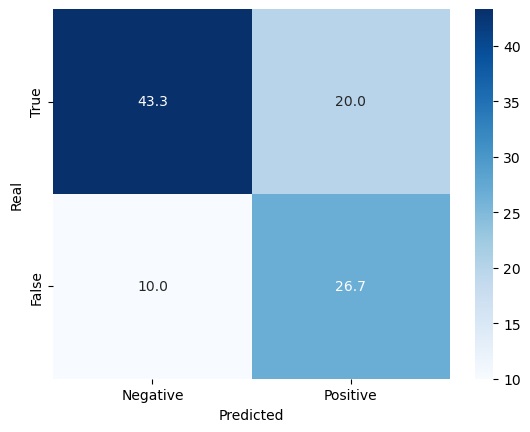

In [18]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

labels = [False, True]
labels_str = ['Negative', 'Positive']
labels_str2= ['True', 'False']

cm = confusion_matrix(y_test,y_pred, labels = [0,1])

cm_percent = cm/cm.sum()*100

sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues', xticklabels= labels_str, yticklabels= labels_str2)
plt.ylabel('Real')
plt.xlabel('Predicted')
plt.show()

In [19]:
from sklearn.metrics import accuracy_score

accuracy = model.score(X_test, y_test)

accuracy


0.7002437043054427

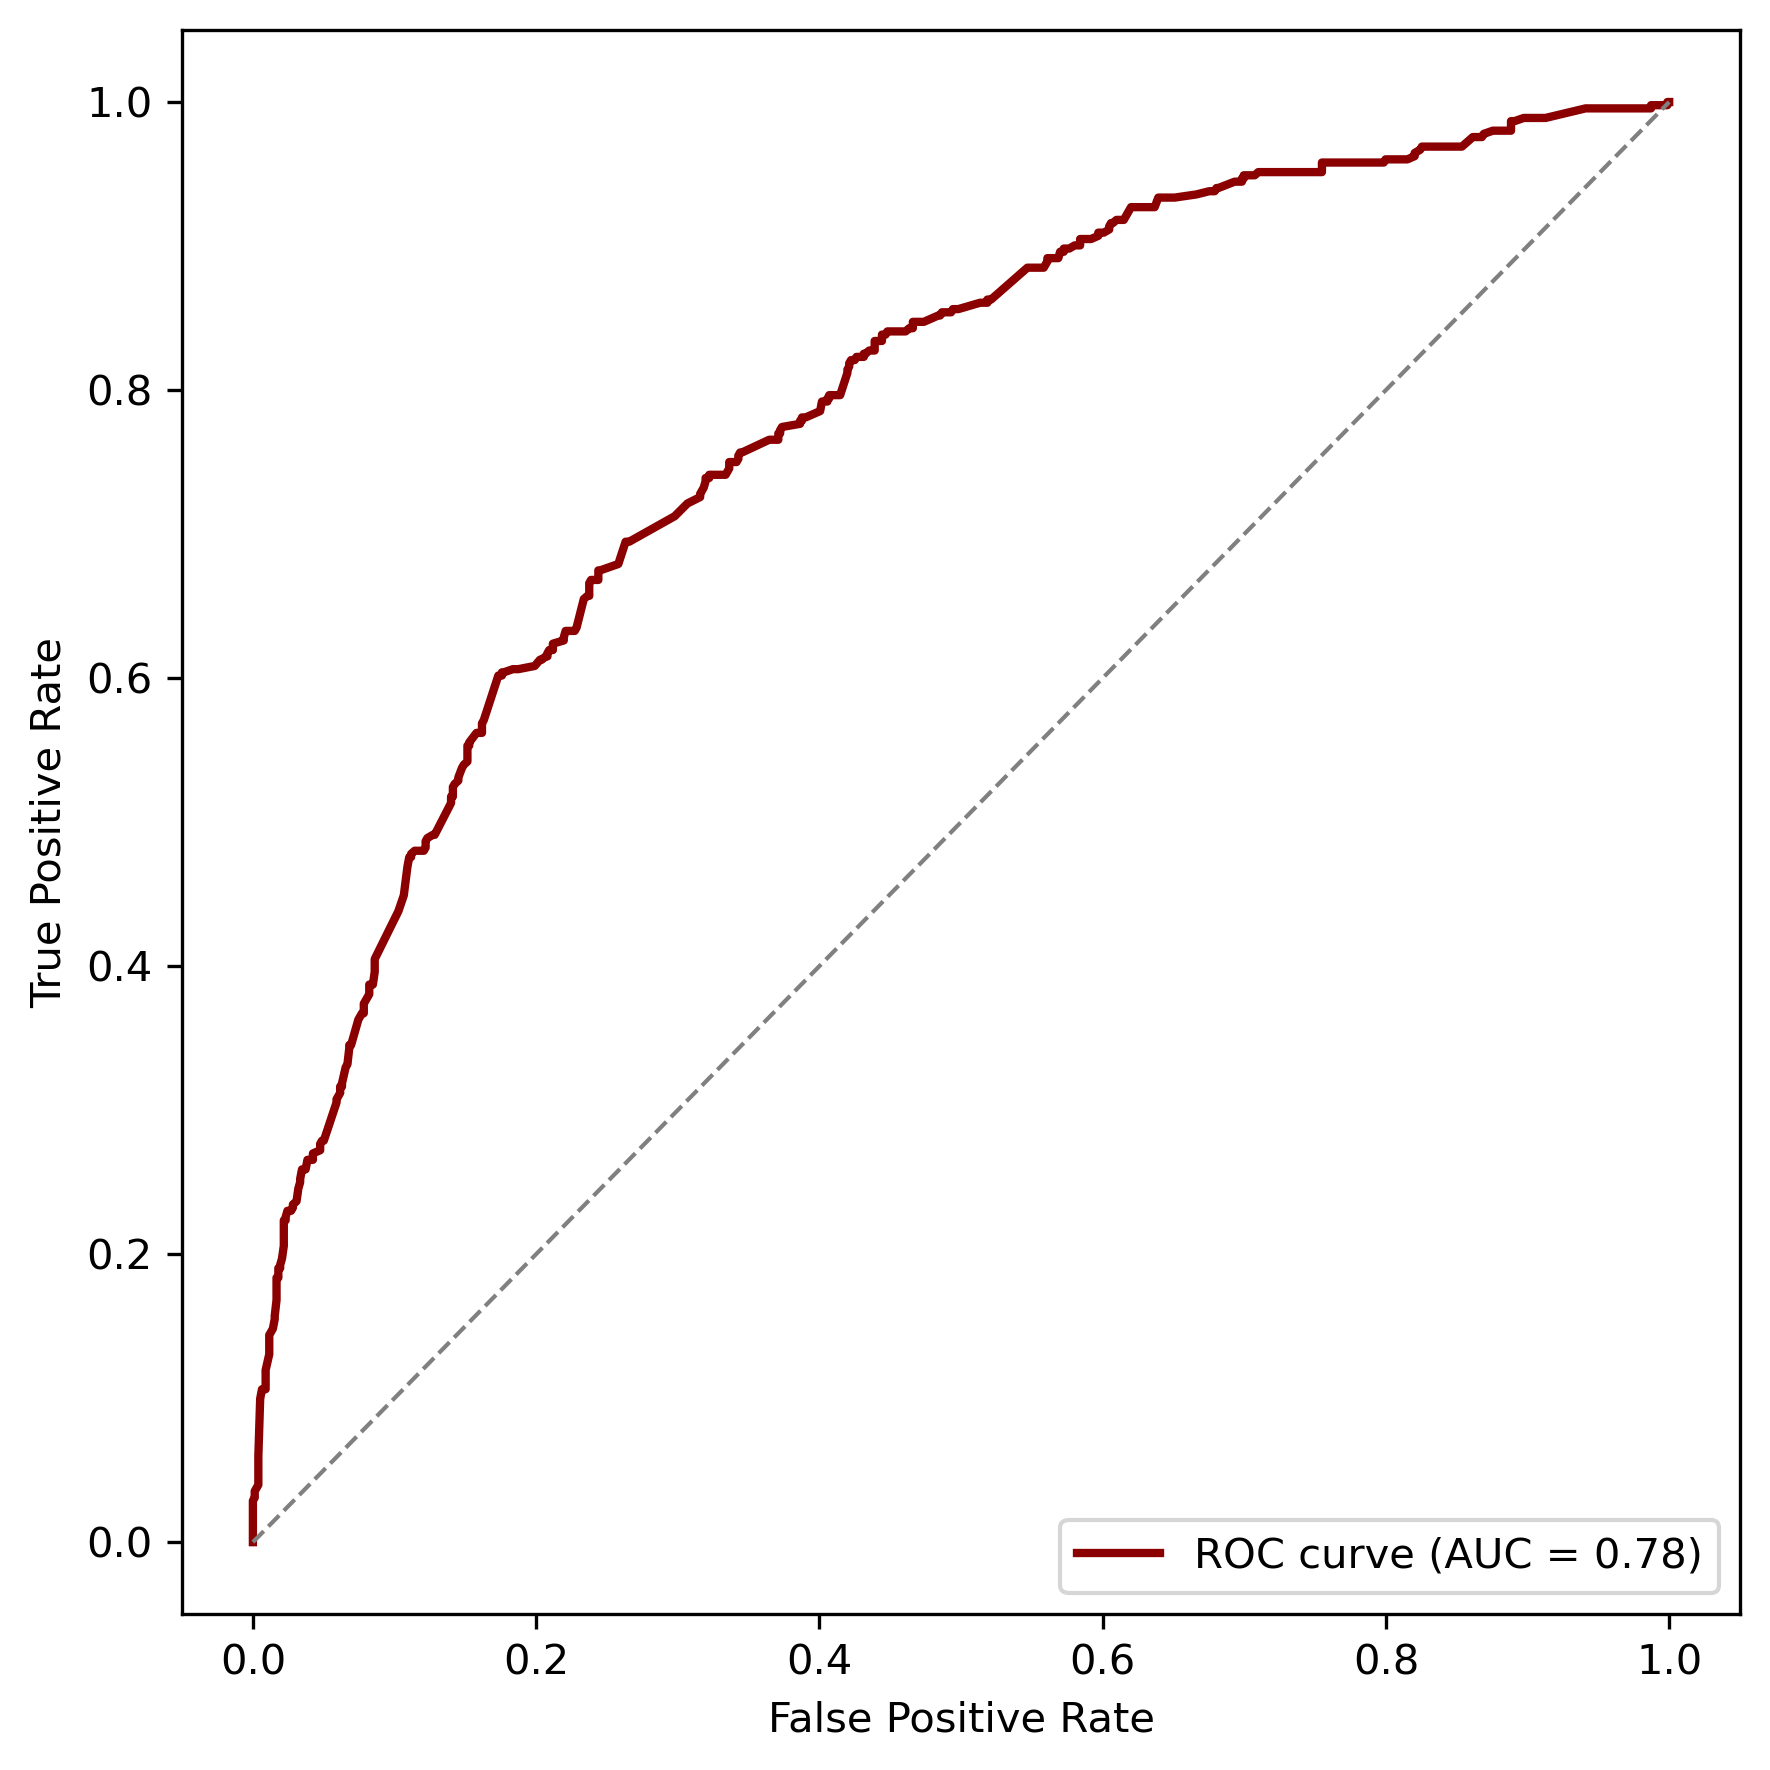

In [20]:
from sklearn.metrics import roc_curve, auc


# Supondo que y_test são os valores reais e probs são as probabilidades do modelo
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6),dpi=300)
plt.plot(fpr, tpr, color='darkred', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300,)
plt.show()

In [21]:
data['Survivorship_prob'].describe()

count    1231.000000
mean        0.456837
std         0.252052
min         0.029370
25%         0.237007
50%         0.459179
75%         0.641169
max         0.962426
Name: Survivorship_prob, dtype: float64

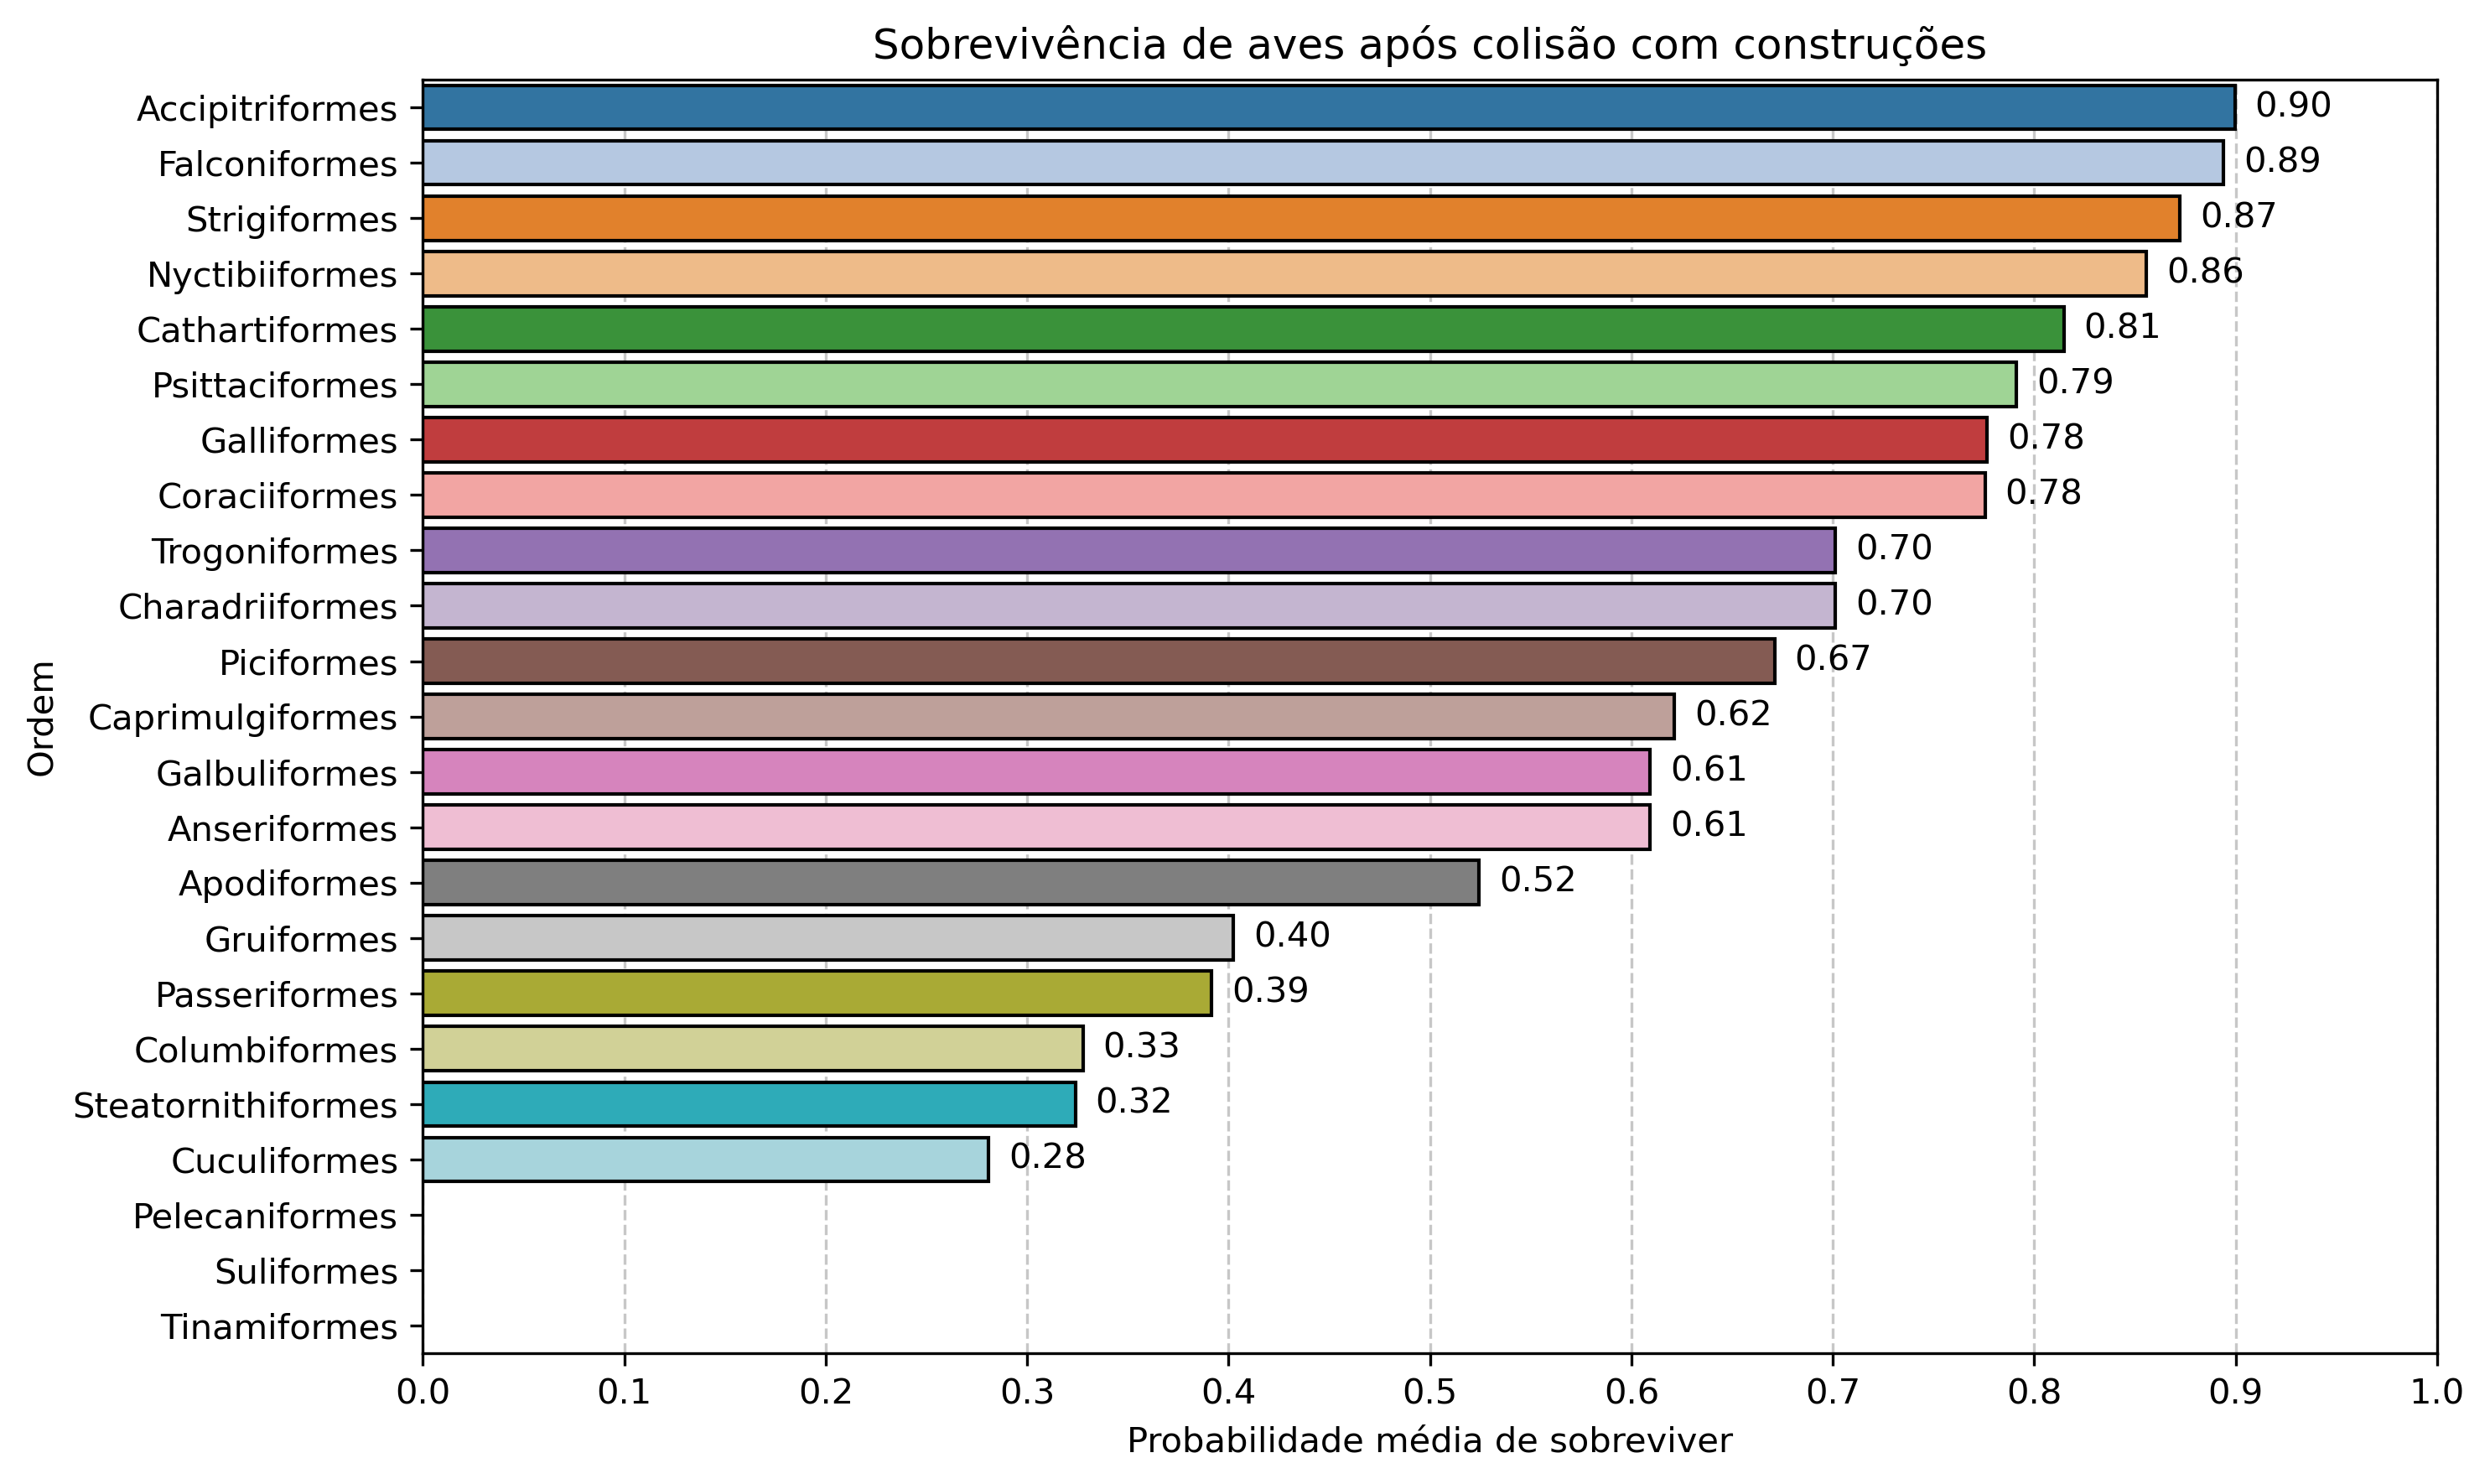

In [22]:
media_prob = data.groupby('Order')['Survivorship_prob'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6), dpi=300)
ax = sns.barplot(x=media_prob.values, 
            y=media_prob.index,
              hue=media_prob.index, 
              palette='tab20',
                legend=False,
                  edgecolor='black', linewidth=1,
                  zorder=2)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Ordem')
plt.xlabel('Probabilidade média de sobreviver')
plt.title('Sobrevivência de aves após colisão com construções')
plt.grid(axis='x', linestyle='--', alpha=0.7, zorder=1)
plt.tight_layout()

# Adiciona o valor da probabilidade acima de cada barra
for i, v in enumerate(media_prob.values):
    ax.text(v + 0.01, i, f"{v:.2f}", va='center', color='black',)


plt.savefig('media_probabilidade_survivorship.png', dpi=300)
plt.show()

In [23]:
data.columns

Index(['General.ID', 'Order', 'Family', 'Genus', 'Species', 'Common.name',
       'IUCN.status', 'Survivorship', 'Age', 'Sex',
       ...
       'Species_Zenaida auriculata', 'Species_Zenaida macroura',
       'Species_Zentrygon chiriquensis', 'Species_Zentrygon costaricensis',
       'Species_Zimmerius chrysops', 'Species_Zimmerius parvus',
       'Species_Zonotrichia capensis', 'Age_encoded',
       'Building_height_encoded', 'Survivorship_prob'],
      dtype='object', length=990)

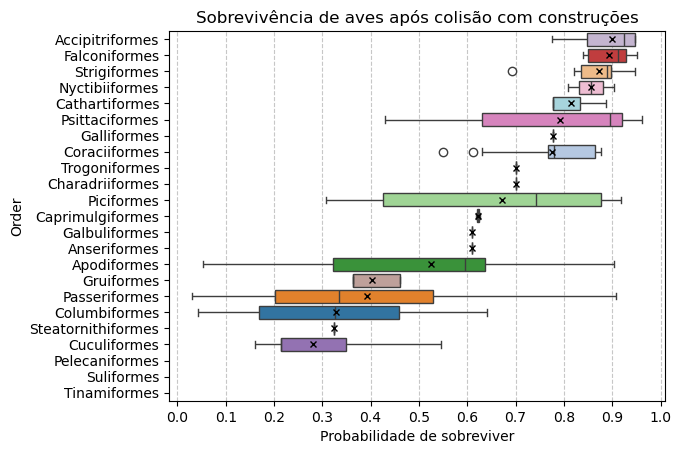

In [24]:
sns.boxplot(data=data,x='Survivorship_prob',y='Order',order=media_prob.index,showmeans=True,hue='Order',legend=False,
            palette='tab20',
            zorder=2,
            meanprops={'marker':'x',
                       'markerfacecolor':'black',
                       'markeredgecolor':'black',
                      'markersize' : 4})
plt.xticks(np.arange(0,1.1,0.1)),
plt.grid(axis='x',linestyle='--',zorder=1, alpha=0.7),
plt.title('Sobrevivência de aves após colisão com construções'),
plt.xlabel('Probabilidade de sobreviver'),

plt.savefig('boxplot.png')
plt.show()

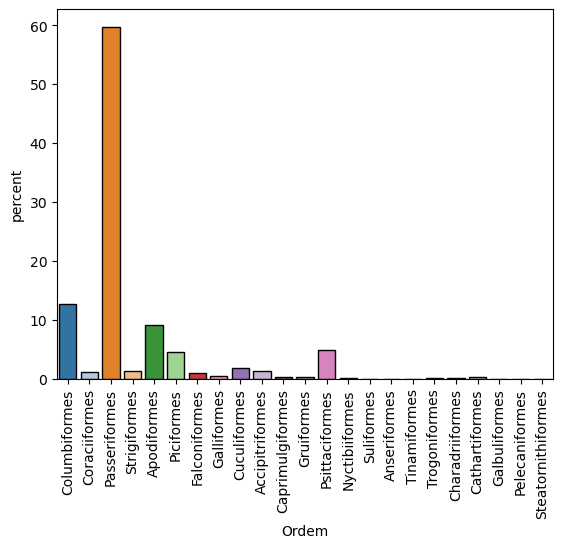

In [29]:
sns.countplot(data=data, x='Order',hue='Order', palette='tab20',stat='percent', legend=False,edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Ordem')
plt.savefig('porcentagem.png')
plt.show()